Global wet bulb temperature vs web bult temperature
Global wet bult temperature is calculated by Andy reference to: https://github.com/QINQINKONG/PyWBGT/tree/v1.0.0

#### 1 daily CONUS404 maps comarison 00 and 12 UTC
- 1.1)  00UTC (12/01/2021)
- 1.2)  12UTC (12/01/2021)

#### 2 monthly average map
- 2.1) Dec of 1980-1981
- 2.2) July of 1980-1981

#### 3 time series of CONUS404 domain average
- 3.1) diurnal cycles  
- 3.2) monthly change 

In [33]:
import os.path
import numpy as np
import xarray as xr
import datetime

import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
def plot_ds(ds, var_s):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(ds.lon, ds.lat, ds[var_s][0], transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    plt.colorbar(mm, orientation='horizontal', pad=0.03)    
    
    plt.title(var_s, fontweight="bold",fontsize=14)
    plt.show()

In [51]:
def plot_cartopy_2d(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap,
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    plt.colorbar(mm, orientation='horizontal', pad=0.03)    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold",fontsize=14)
    plt.show()

In [4]:
dir_gt = '/glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/'
dir_t = '/glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/'

year_s = 1980
year_e = 2021

##### 1.1) test on 00UTC random day (12/01/2021)

/glade/work/mingge/miniconda3/envs/casper_2020/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_202112_CONUS404.nc


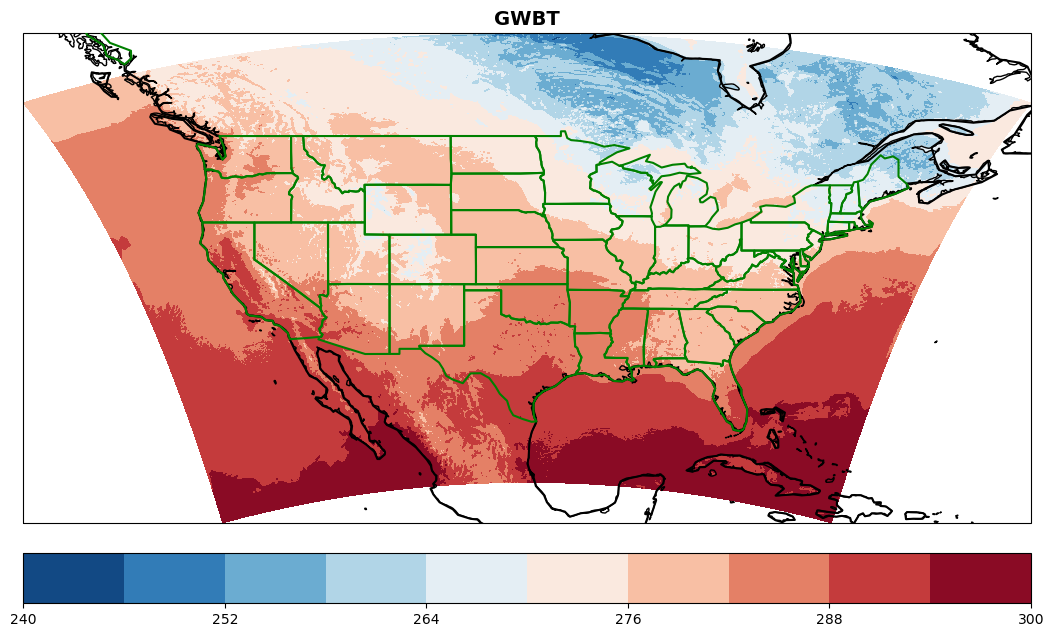

TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_202112_CONUS404.nc


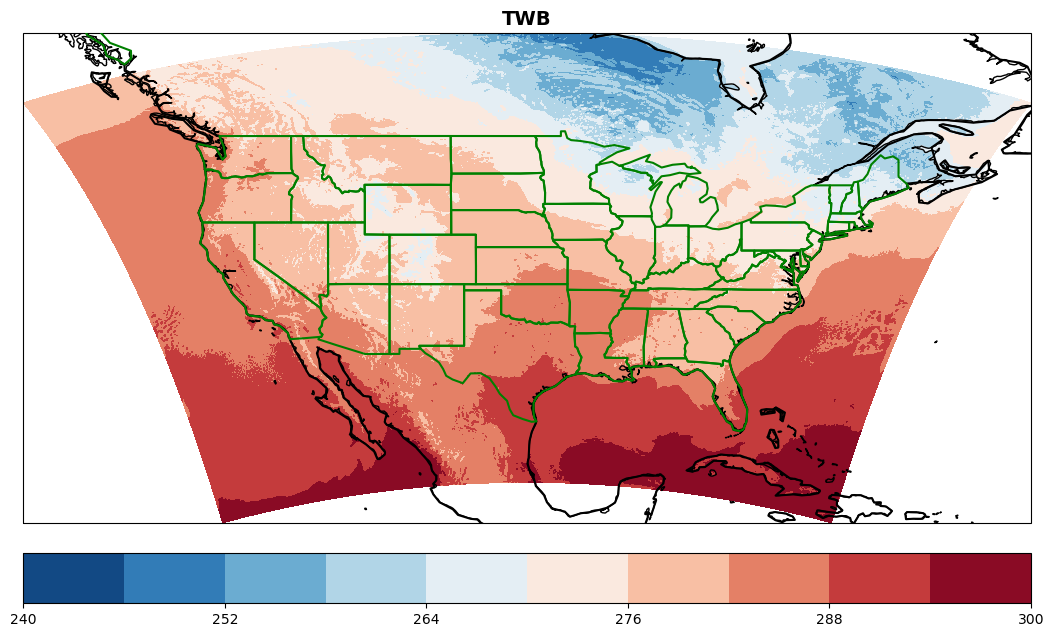

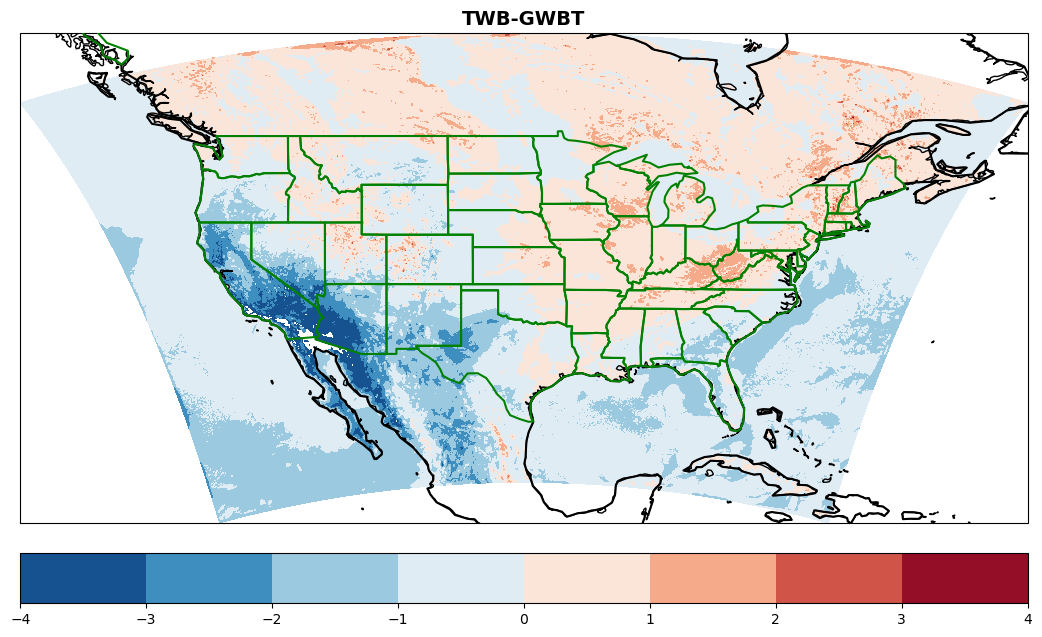

In [5]:
var_s = ['GWBT', 'TWB']
dir_1d = [dir_gt, dir_t]
n_var = len(var_s)

for nv in range(n_var):
    flnm = dir_1d[nv] + var_s[nv] + '_202112_CONUS404.nc'
     
    with  xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        plot_cartopy_2d (ds.lat, ds.lon, ds[var_s[nv]][0], var_s[nv], 240, 300,11,'RdBu_r') 
        if nv == 0:
            data_0 =  ds[var_s[nv]][0]
        else:
            data_2d = ds[var_s[nv]][0].values  - data_0.values 
            plot_cartopy_2d (ds.lat, ds.lon, data_2d, var_s[nv] + '-' + var_s[0], -4, 4, 9, 'RdBu_r') 

##### 1.2) test on 12UTC the same day as 1.1 (12/01/2021)

GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_202112_CONUS404.nc


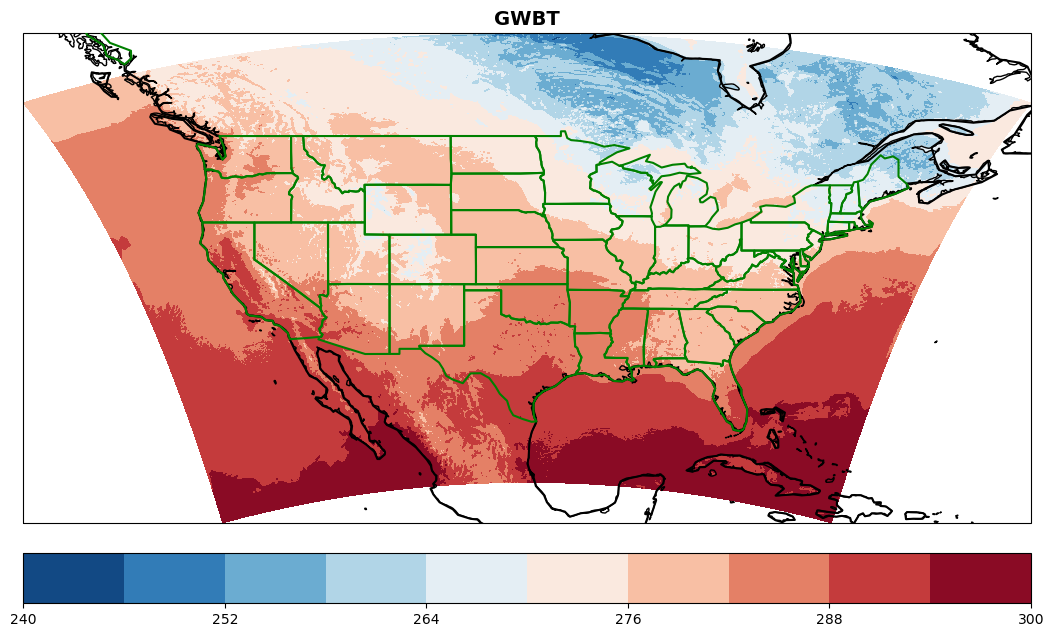

TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_202112_CONUS404.nc


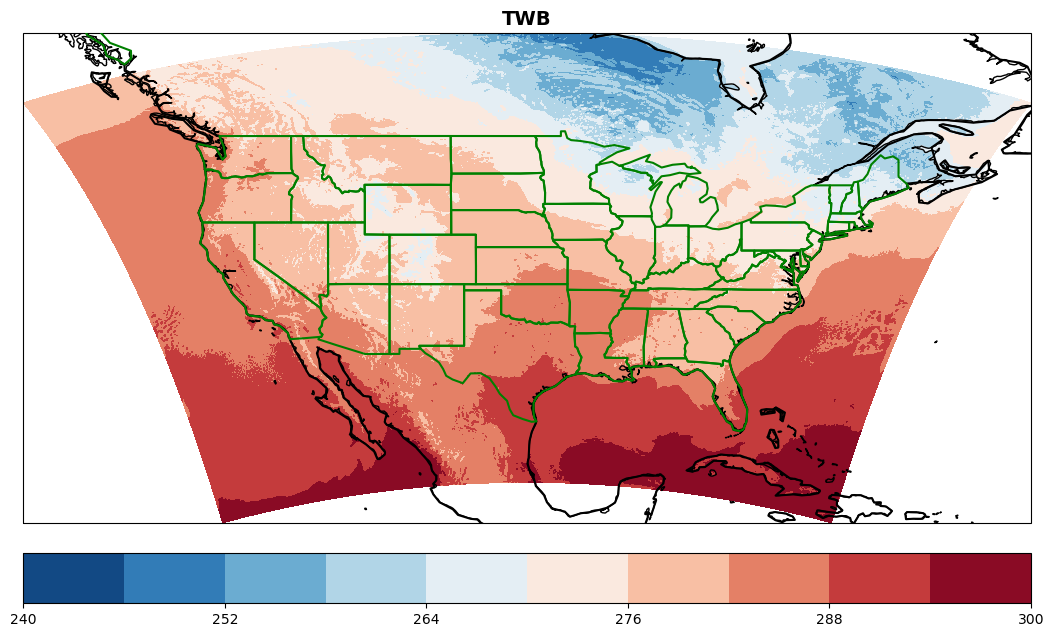

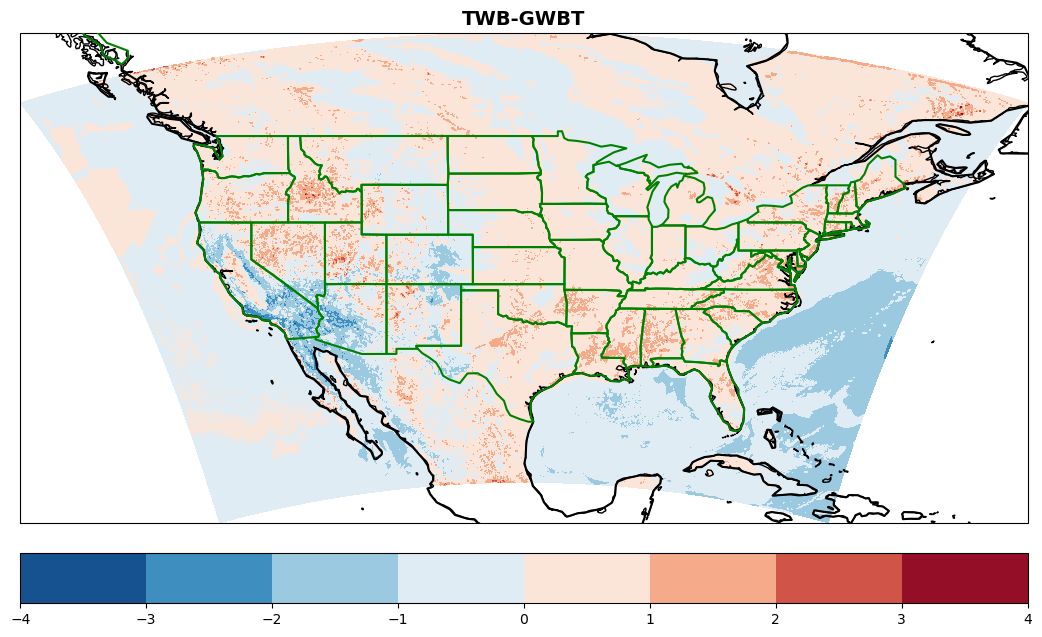

In [10]:
for nv in range(n_var):
    flnm = dir_1d[nv] + var_s[nv] + '_202112_CONUS404.nc'
     
    with  xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        plot_cartopy_2d (ds.lat, ds.lon, ds[var_s[nv]][0], var_s[nv], 240, 300,11,'RdBu_r') 
        if nv == 0:
            data_0 =  ds[var_s[nv]][12]
        else:
            data_2d = ds[var_s[nv]][12].values  - data_0.values 
            plot_cartopy_2d (ds.lat, ds.lon, data_2d, var_s[nv] + '-' + var_s[0], -4, 4, 9, 'RdBu_r') 

#### 2.1 test on winter of radom years (Dec 1981-1982)

GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_198012_CONUS404.nc
GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_198112_CONUS404.nc


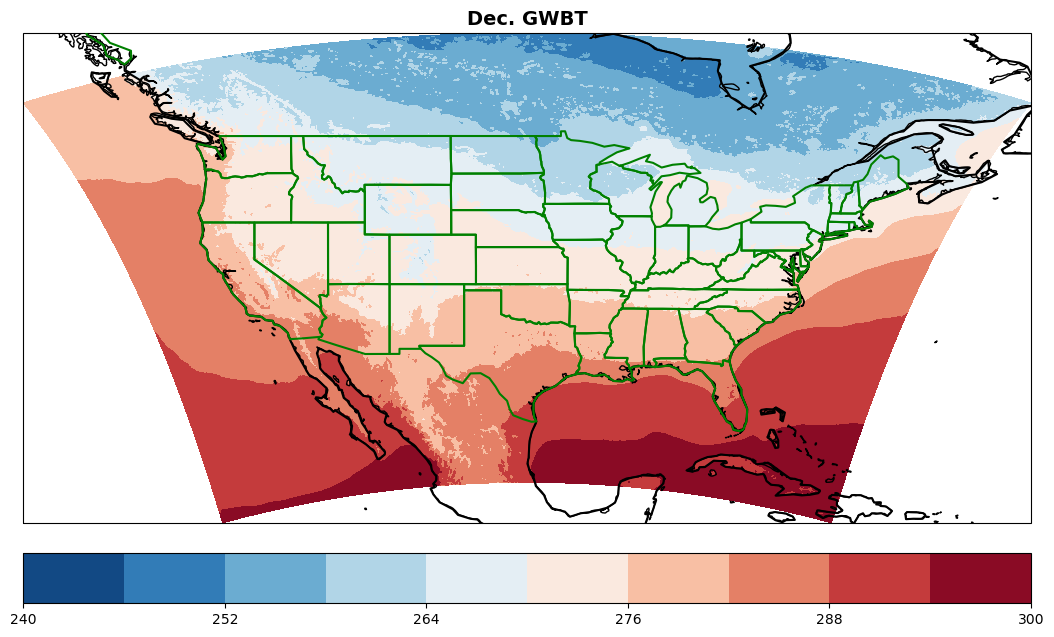

TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198012_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198112_CONUS404.nc


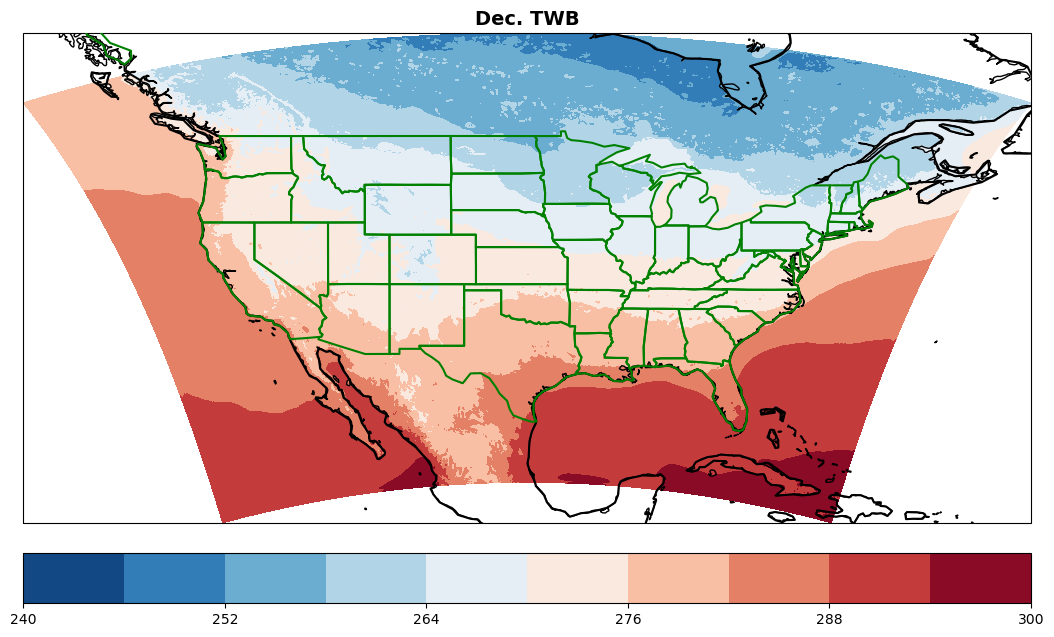

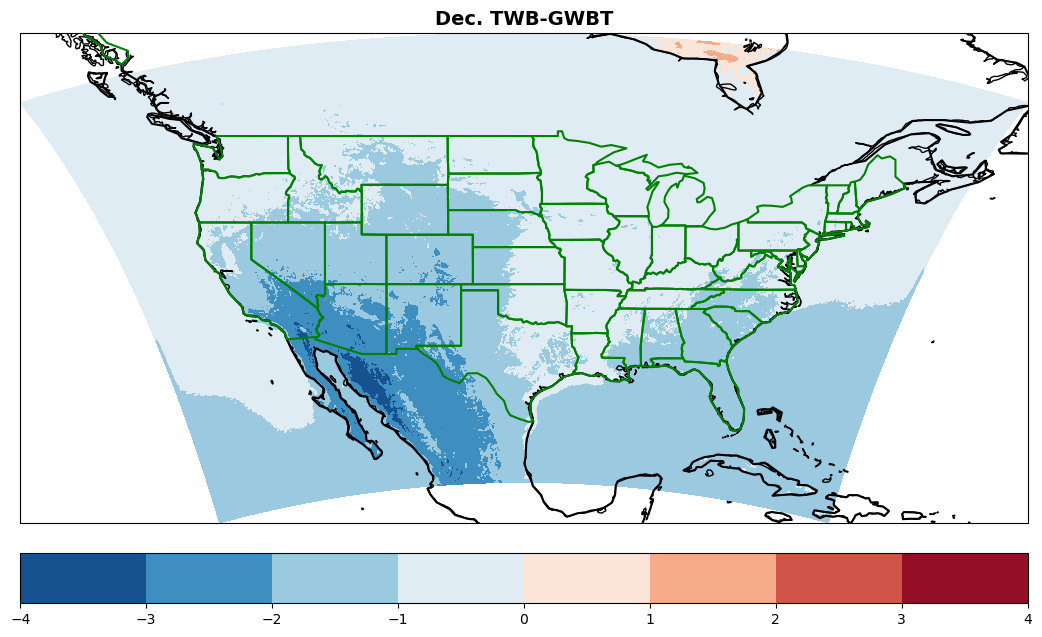

In [19]:
var_s = ['GWBT', 'TWB']
dir_1d = [dir_gt, dir_t]
n_var = len(var_s)

year_s = 1980
year_e = 2021
year_e = year_s + 1
n_year = year_e - year_s + 1

month = 12
for nv in range(n_var):
    for year in range(year_s, year_e + 1):
        flnm = dir_1d[nv] + var_s[nv] + '_' + str(year) + '12_CONUS404.nc'
     
        with  xr.open_dataset(flnm) as ds:
            print(var_s[nv],flnm)
            data_t =  ds[var_s[nv]].mean(dim= 'time')
                       
        if year == year_s:
            data = data_t.copy()
        else:
            data_2d = data + data_t
                    
    plot_cartopy_2d (ds.lat, ds.lon, data_2d/n_year, 'Dec. ' + var_s[nv], 240, 300,11,'RdBu_r') 
    
    if nv == 0:
        data_0 = data_2d
    else:
        data_2d = data_2d.values  - data_0.values 
        plot_cartopy_2d (ds.lat, ds.lon, data_2d/n_year, 'Dec. ' + var_s[nv] + '-' + var_s[0], -4, 4, 9, 'RdBu_r') 

#### 2.2 test on summer of radom years (July 1981-1982)

GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_198007_CONUS404.nc
GWBT /glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/GWBT_198107_CONUS404.nc


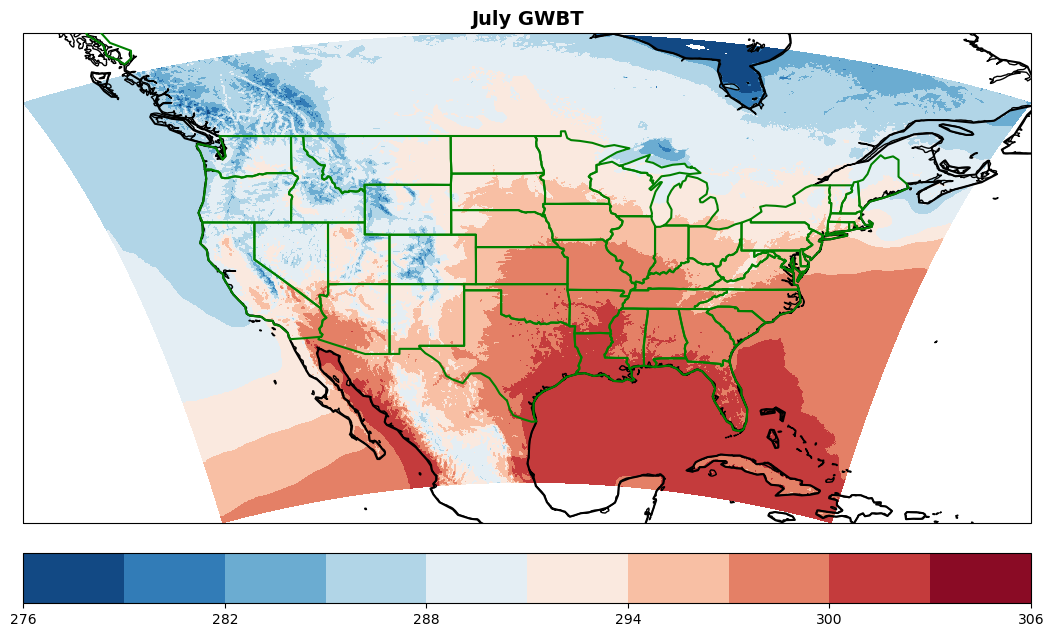

TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198007_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198107_CONUS404.nc


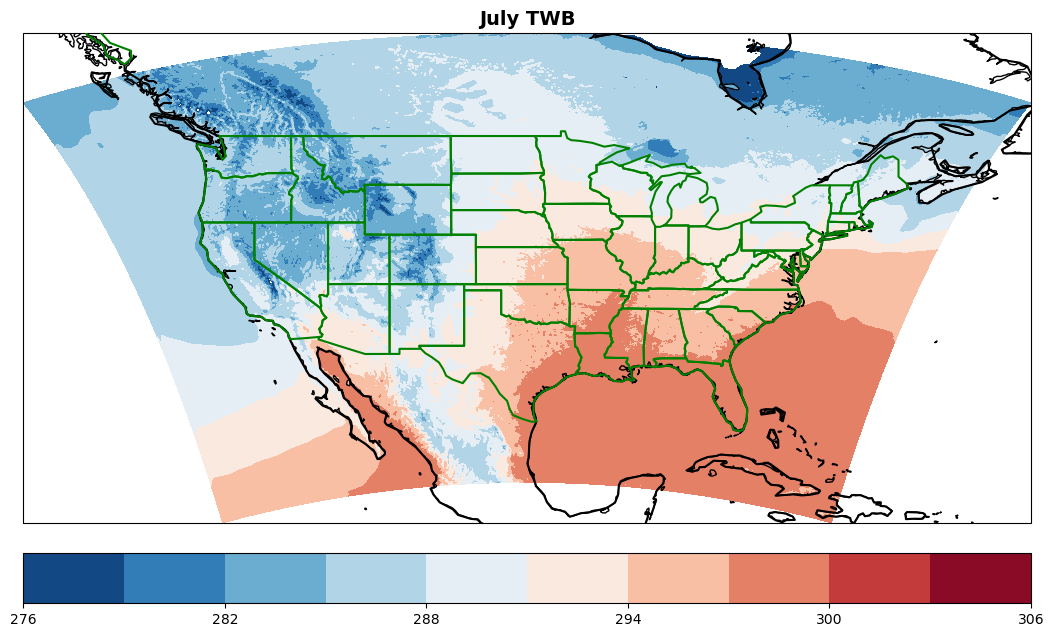

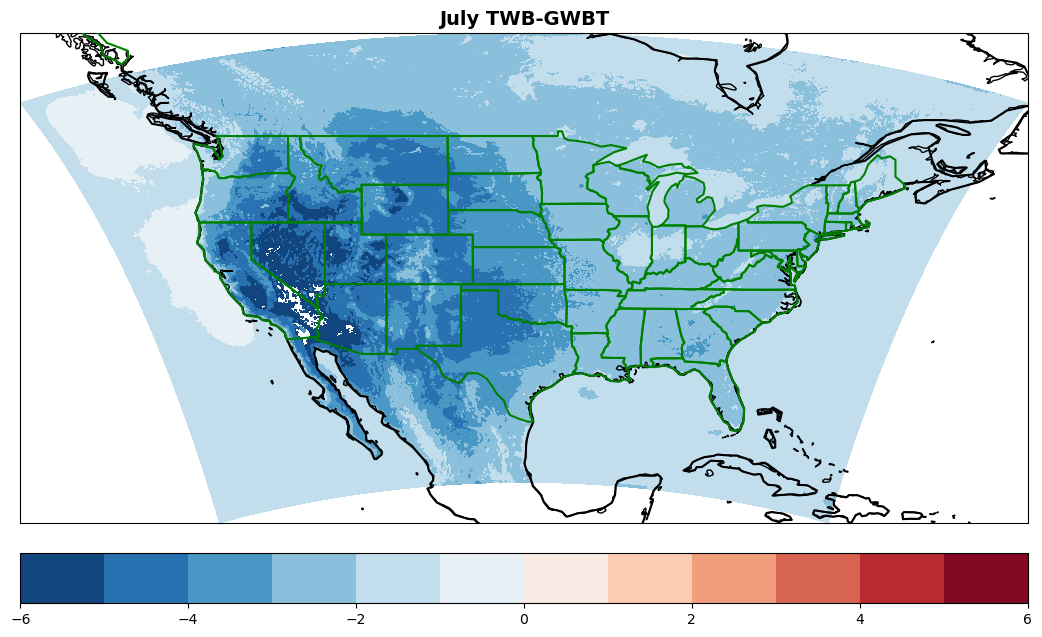

In [43]:
year_s = 1980
year_e = 2021
year_e = year_s + 1
n_year = year_e - year_s + 1

 
for nv in range(n_var):
    for year in range(year_s, year_e + 1):
        flnm = dir_1d[nv] + var_s[nv] + '_' + str(year) + '07_CONUS404.nc'
     
        with  xr.open_dataset(flnm) as ds:
            print(var_s[nv],flnm)
            data_t =  ds[var_s[nv]].mean(dim= 'time')
                       
        if year == year_s:
            data = data_t.copy()
        else:
            data_2d = data + data_t
                    
    plot_cartopy_2d (ds.lat, ds.lon, data_2d/n_year, 'July ' + var_s[nv], 276, 306, 11, 'RdBu_r') 
    
    if nv == 0:
        data_0 = data_2d
    else:
        data_2d = data_2d.values  - data_0.values 
        plot_cartopy_2d (ds.lat, ds.lon, data_2d/n_year, 'July ' + var_s[nv] + '-' + var_s[0], -6, 6, 13, 'RdBu_r') 

#### 3 Time series

In [35]:
dir_o     = '/glade/campaign/mmm/c3we/mingge/DOD/'

year_s = 1980
year_e = 2021
year_e = year_s + 1
n_year = year_e - year_s + 1

StartDay = datetime.datetime(year_s, 1, 1, 0)
StopDay  = datetime.datetime(year_e, 12, 31, 23)
TimeHH   = pd.date_range(StartDay, end=StopDay, freq='1h')

for nv in range(n_var):
    flnm_o = dir_o + var_s[nv] + '_' + str(year_s) + '-' + str(year_e) + '_conus404.csv'
    if os.path.exists(flnm_o): 
        print(flnm_o, 'exist')
    else:  
        print(flnm_o)
        for year in range(year_s, year_e + 1):
            for month in range(1, 13):
                flnm = dir_1d[nv] + var_s[nv] + '_' + str(year) + str(month).zfill(2) + '_CONUS404.nc'
     
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv],flnm)
                    if var_s[nv] == 'GWBT':
                        data_t =  ds[var_s[nv]].mean(dim= ['x', 'y'])
                    elif  var_s[nv] == 'TWB':
                        data_t =  ds[var_s[nv]].mean(dim= ['xc', 'yc'])
                       
                if year == year_s and month == 1:
                    data_1d = data_t.copy()
                else:
                    data_1d = np.append(data_1d, data_t)
                    
        df = pd.DataFrame(data_1d, index = TimeHH,  columns = ['conus404'])
         
        print(flnm_o)
         
        df.to_csv(flnm_o)      

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_1980-1981_conus404.csv exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_1980-1981_conus404.csv
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198001_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198002_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198003_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198004_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198005_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198006_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198007_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198008_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198009_CONUS404.nc
TWB /glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData/TWB/TWB_198010

#### 3.1 diurnal cycle difference of domain average 
- 3.1.a) diurnal cycle of July

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_1980-1981_conus404.csv
/glade/campaign/mmm/c3we/mingge/DOD/TWB_1980-1981_conus404.csv


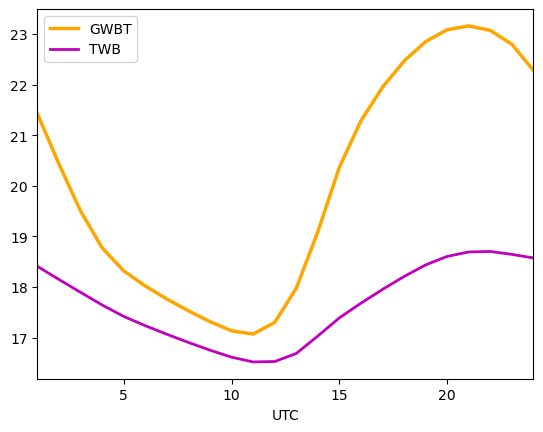

In [42]:
flnm_i_1d = [dir_o + 'GWBT_1980-1981_conus404.csv', dir_o + 'TWB_1980-1981_conus404.csv']
style_l = ['solid', 'solid','solid','solid','solid','dashed','dashed','dashed','dashed','dashed']
lw_l    = [2.5,      2,      1.5,    1,       0.5,   2.5,     2,       1.5,      1,      0.5 ]
color_l = ['orange','m',    'r',     'r',     'r',  'black', 'darkgreen','b',  'b',      'b']


ct = 0
for flnm in flnm_i_1d:
    df = pd.read_csv(flnm, index_col = 0)
    print(flnm)
    
    # Create DatetimeIndex by DataFrame.set_index
    # in order to use 'resample'
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H')
    df['hour'] = df.index.hour    
    df['month'] =  df.index.month
    
    # Aug group 8
    ind_m = df.groupby('month').get_group((7)).index
    df_m =  df.loc[ind_m]
    df_h =  df_m.groupby('hour').mean()
    
    Tdiurnal= df_h['conus404'] - 273.15
        
    plt.plot(range(1,25), Tdiurnal, label = var_s[ct] , linestyle= style_l[ct], 
                 color = color_l[ct],linewidth = lw_l[ct])  
    ct = ct +1
    
plt.xlabel('UTC')
plt.xlim([1, 24])
plt.legend()
plt.show()

 - 3.1.b) diurnal cycle of all months

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_1980-1981_conus404.csv
/glade/campaign/mmm/c3we/mingge/DOD/TWB_1980-1981_conus404.csv


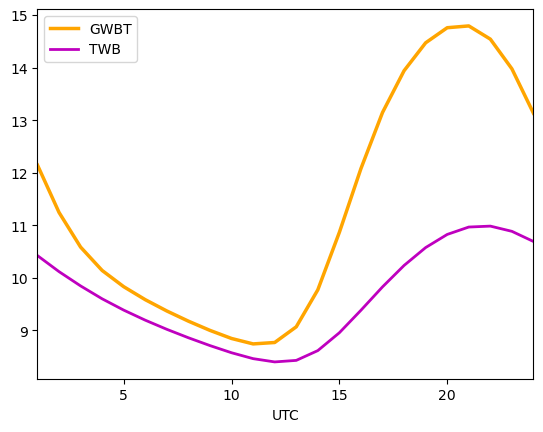

In [40]:
ct = 0
for flnm in flnm_i_1d:
    df = pd.read_csv(flnm, index_col = 0)
    print(flnm)
    
    # Create DatetimeIndex by DataFrame.set_index
    # in order to use 'resample'
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H')
    df['hour'] = df.index.hour    
    df['month'] = df.index.month
    
    df_h =  df.groupby('hour').mean()
    
    Tdiurnal= df_h['conus404'] - 273.15
        
    plt.plot(range(1,25), Tdiurnal, label = var_s[ct], linestyle= style_l[ct], 
                 color = color_l[ct],linewidth = lw_l[ct])  
    ct = ct +1
    
plt.xlabel('UTC')
plt.xlim([1, 24])
plt.legend()
plt.show()

#### 3.2) Monthly change of CONUS domain

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_1980-1981_conus404.csv
/glade/campaign/mmm/c3we/mingge/DOD/TWB_1980-1981_conus404.csv


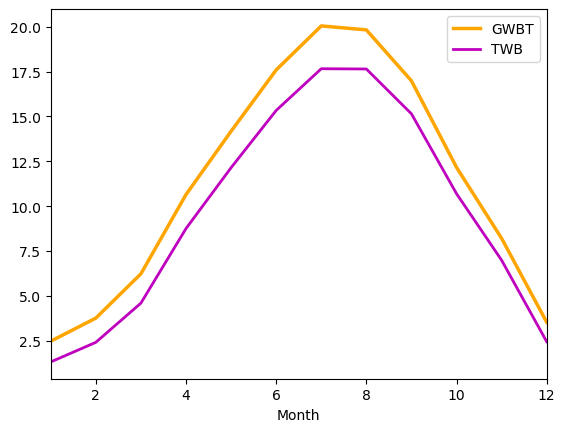

In [41]:
ct = 0
for flnm in flnm_i_1d:
    df = pd.read_csv(flnm, index_col = 0)
    print(flnm)
    
    # Create DatetimeIndex by DataFrame.set_index
    # in order to use 'resample'
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H')
    df['hour'] = df.index.hour    
    df['month'] = df.index.month
    
    df_h =  df.groupby('month').mean()
    
    Tdiurnal= df_h['conus404'] - 273.15
        
    plt.plot(range(1,13), Tdiurnal, label = var_s[ct], linestyle= style_l[ct], 
                 color = color_l[ct],linewidth = lw_l[ct])  
    ct = ct + 1
    
plt.xlabel('Month')
plt.xlim([1, 12])
plt.legend()
plt.show()

#### Terrain plot

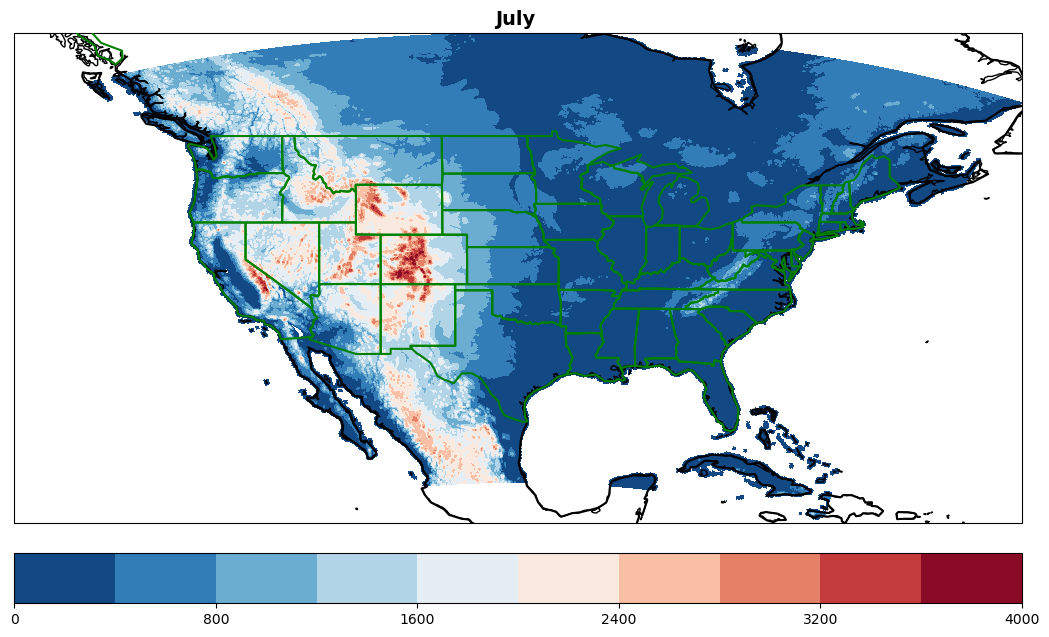

In [47]:
flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
with xr.open_dataset(flnm) as ds:
    hgt = ds.HGT[0]
    plot_cartopy_2d (ds.XLAT[0], ds.XLONG[0], hgt, 'July ', 0, 4000, 11, 'RdBu_r')      

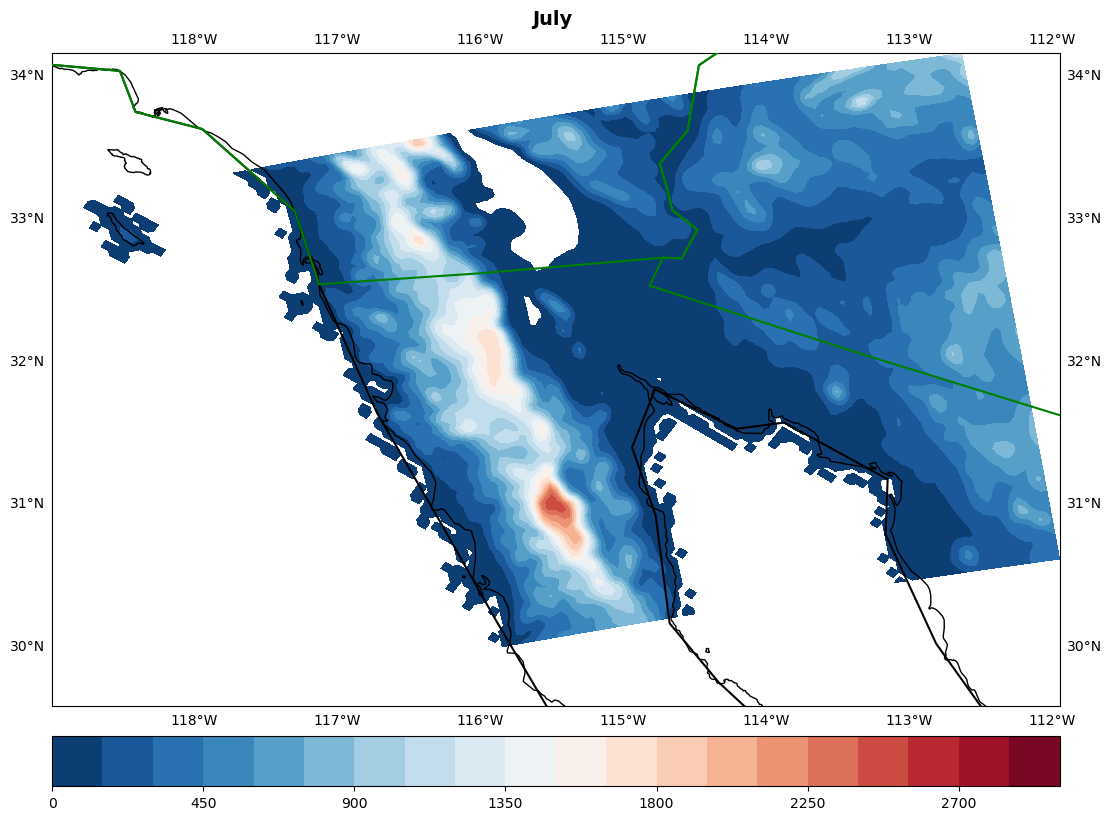

In [61]:
lon_pt = -114.47603157249804
lat_pt = 32.665135

i_s = 300
i_e = 400
j_s = 200
j_e = 350
plot_cartopy_2d (ds.XLAT[0, i_s:i_e, j_s:j_e], ds.XLONG[0, i_s:i_e, j_s:j_e], hgt[i_s:i_e, j_s:j_e], 'July ', 0, 3000, 21, 'RdBu_r')

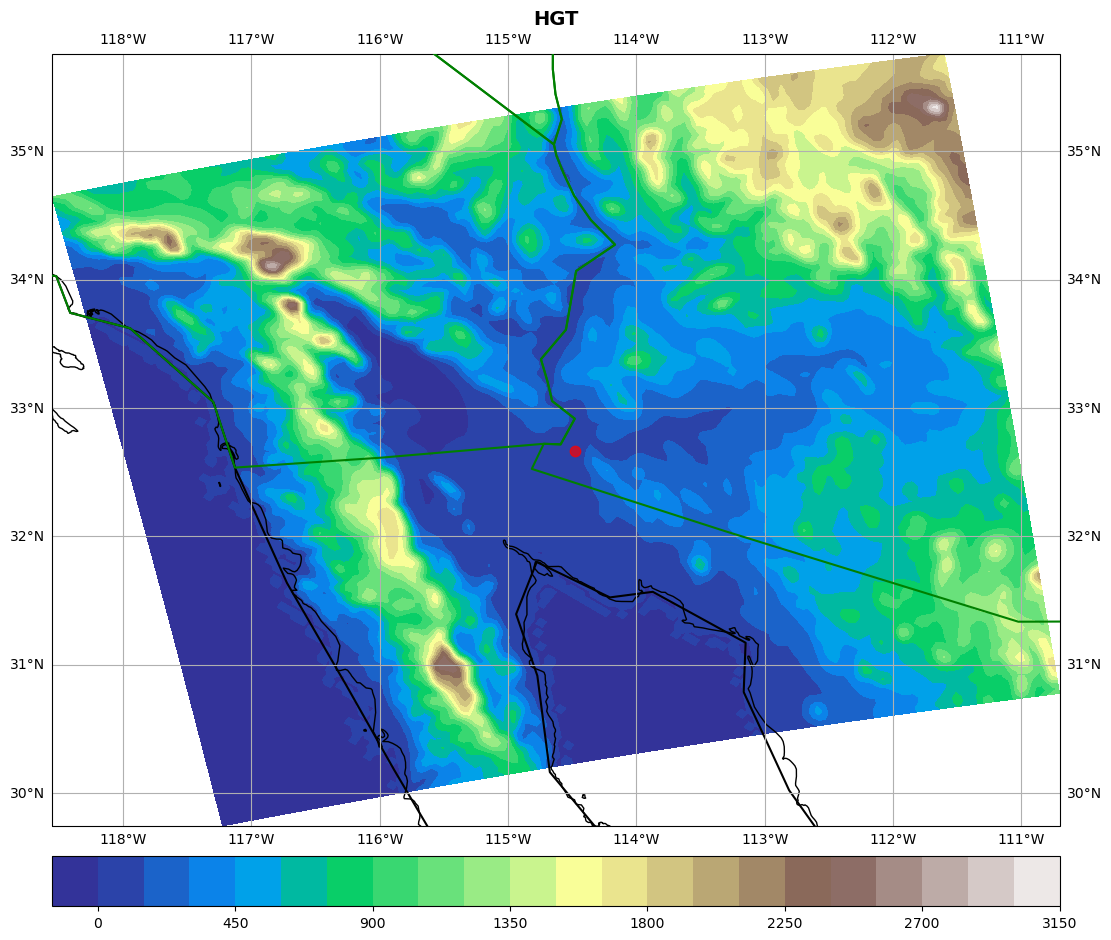

In [85]:
lon_pt = -114.47603157249804
lat_pt = 32.665135

i_s = 300
i_e = 440
j_s = 220
j_e = 380

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
mm = plt.contourf(ds.XLONG[0, i_s:i_e, j_s:j_e], ds.XLAT[0, i_s:i_e, j_s:j_e], hgt[i_s:i_e, j_s:j_e],
                  vmin = 0, vmax = 3200, levels = 30,
                  cmap = 'terrain',
                  transform=ccrs.PlateCarree())
ax.plot(lon_pt, lat_pt, marker='.', color='red', markersize=15, alpha=0.7, transform=ccrs.Geodetic())

ax.coastlines()
 
ax.coastlines(lw=1.5, resolution='110m')
ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
plt.colorbar(mm, orientation='horizontal', pad=0.03)    

gl = ax.gridlines(draw_labels=True)   
gl.xlines = gl.ylines = True
    
plt.title('HGT', fontweight="bold",fontsize=14)
plt.show()

